##### 視窗中開啟新視窗
這篇教學會介紹使用 PyQt5 建立基本的應用程式視窗，並在主視窗中點擊按鈕開啟新視窗，更會進一步實作點擊按鈕修改其他視窗文字的效果。

##### 建立 PyQt5 視窗 
參考「QPushButton 按鈕」文章範例，建立具有 QLabel 和 QPushButton 的視窗。

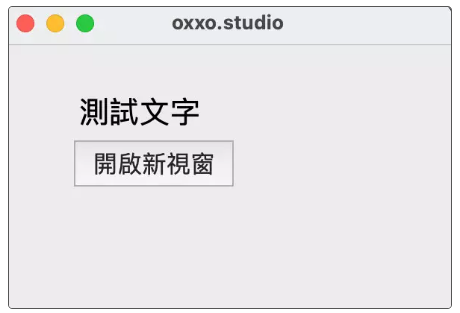

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label = QtWidgets.QLabel(Form)
label.setText('測試文字')
label.setStyleSheet('font-size:20px;')
label.setGeometry(50,30,100,30)

btn = QtWidgets.QPushButton(Form)
btn.setText('開啟新視窗')
btn.setStyleSheet('font-size:16px;')
btn.setGeometry(40,60,120,40)

Form.show()
sys.exit(app.exec_())

同樣的結果也可使用 class 的寫法：

In [ ]:
# 从 PyQt5 包中导入 QtWidgets 模块，它包含用于构建图形用户界面的类。
from PyQt5 import QtWidgets
import sys  # 导入 sys 模块，用于处理与 Python 解释器相关的操作，如命令行参数和程序退出。

# 定义一个名为 mainWindow 的类，继承自 QtWidgets.QWidget，这是所有窗口类型组件的基类。
class mainWindow(QtWidgets.QWidget):
    # 类的初始化方法。
    def __init__(self):
        super().__init__()  # 调用父类的构造函数，进行基本的窗口设置。
        self.setWindowTitle('oxxo.studio')  # 设置窗口的标题。
        self.resize(300, 200)  # 设置窗口的大小。
        self.ui()  # 调用自定义的 ui 方法来创建用户界面。

    # 定义一个名为 ui 的方法，用于设置窗口中的组件和布局。
    def ui(self):
        # 创建一个 QLabel 对象作为文本显示，并设置其属性。
        self.label = QtWidgets.QLabel(self)  # 将标签实例化并设置为当前窗口的子项。
        self.label.setText('測試文字')  # 设置标签的显示文本。
        self.label.setStyleSheet('font-size:20px;')  # 设置标签的样式，这里是字体大小。
        self.label.setGeometry(50, 30, 100, 30)  # 设置标签的位置和大小。

        # 创建一个 QPushButton 对象作为按钮，并设置其属性。
        self.btn = QtWidgets.QPushButton(self)  # 将按钮实例化并设置为当前窗口的子项。
        self.btn.setText('開啟新視窗')  # 设置按钮的显示文本。
        self.btn.setStyleSheet('font-size:16px;')  # 设置按钮的样式，这里是字体大小。
        self.btn.setGeometry(40, 60, 120, 40)  # 设置按钮的位置和大小。

# 程序的入口点。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 创建 QApplication 实例，这是每个 PyQt 应用程序所必需的。
    Form = mainWindow()  # 创建 mainWindow 类的实例。
    Form.show()  # 显示创建的窗口。
    sys.exit(app.exec_())  # 启动应用程序的事件循环，并在窗口关闭时退出程序。

##### 主視窗點擊按鈕，開啟新視窗 
主視窗建立後，仿照主視窗建立方法建立新視窗，並將主視窗的按鈕綁定「點擊後開啟新視窗」的匿名函式，程式執行後，點擊主視窗的按鈕，就會開啟新視窗。

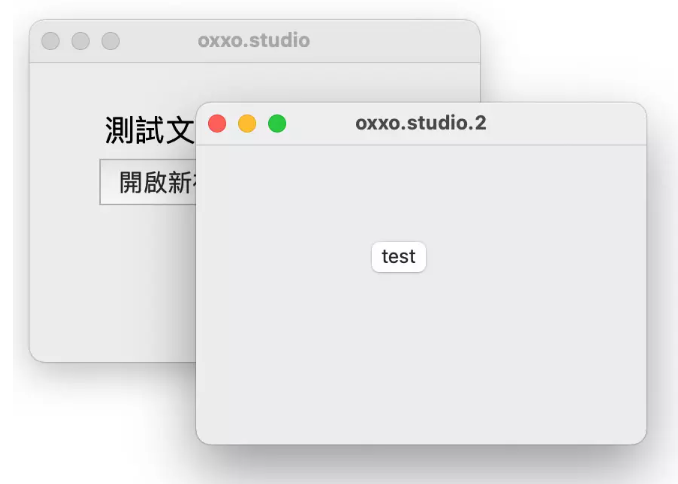

In [ ]:
from PyQt5 import QtWidgets, QtGui, QtCore
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label = QtWidgets.QLabel(Form)
label.setText('測試文字')
label.setStyleSheet('font-size:20px;')
label.setGeometry(50,30,100,30)

btn = QtWidgets.QPushButton(Form)
btn.setText('開啟新視窗')
btn.setStyleSheet('font-size:16px;')
btn.setGeometry(40,60,120,40)
btn.clicked.connect(lambda:Form2.show())  # 使用 lambda 函式，顯示新視窗

Form2 = QtWidgets.QWidget()               # 建立新視窗
Form2.setWindowTitle('oxxo.studio.2')
Form2.resize(300, 200)

btn2 = QtWidgets.QPushButton(Form2)
btn2.setText('test')
btn2.setGeometry(110,60,50,30)

Form.show()
sys.exit(app.exec_())

由於多視窗可能會牽扯到互相呼叫與傳遞訊息的操作，建議使用 class 的做法。

In [ ]:
from PyQt5 import QtWidgets
import sys

# 主視窗
class mainWindow(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(300, 200)
        self.ui()

    def ui(self):
        self.label = QtWidgets.QLabel(self)
        self.label.setText('測試文字')
        self.label.setStyleSheet('font-size:20px;')
        self.label.setGeometry(50,30,100,30)

        self.btn = QtWidgets.QPushButton(self)
        self.btn.setText('開啟新視窗')
        self.btn.setStyleSheet('font-size:16px;')
        self.btn.setGeometry(40,60,120,40)
        self.btn.clicked.connect(self.showNewWindow)

    def showNewWindow(self):
        self.nw = newWindow()       # 連接新視窗
        self.nw.show()              # 顯示新視窗
        x = self.nw.pos().x()       # 取得新視窗目前 x 座標
        y = self.nw.pos().y()       # 取得新視窗目前 y 座標
        self.nw.move(x+100, y+100)  # 移動新視窗位置

# 新視窗
class newWindow(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio.2')
        self.resize(300, 200)
        self.ui()

    def ui(self):
        self.btn = QtWidgets.QPushButton(self)
        self.btn.setText('test')
        self.btn.setStyleSheet('font-size:16px;')
        self.btn.setGeometry(40,60,120,40)

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = mainWindow()
    Form.show()
    sys.exit(app.exec_())

##### 點擊按鈕修改其他視窗文字 
在主視窗點擊按鈕所開啟的新視窗，是根據定義的 class 而產生的新視窗物件，因此只要將主視窗與新視窗的程式都寫在主視窗裡，\
就能讓彼此都能獲得點擊按鈕的訊息，執行下方的程式碼，點擊按鈕開啟新視窗後，點擊新視窗的按鈕時，主視窗的文字會發生變化，\
點擊主視窗的按鈕時，新視窗裡的文字也會發生變化。

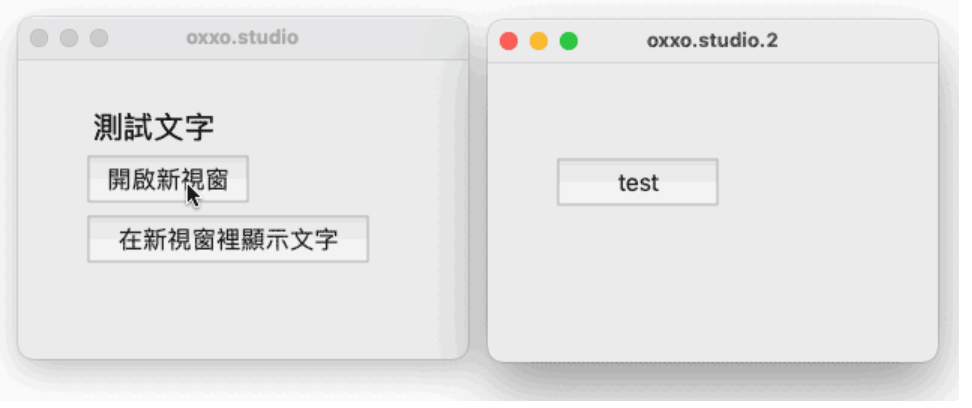

In [ ]:
# 导入 PyQt5 中用于构建图形用户界面的组件模块和系统模块。
from PyQt5 import QtWidgets
import sys  # 导入 sys 模块，用于访问与 Python 解释器相关的命令和函数。

# 定义一个 mainWindow 类，继承自 QtWidgets.QWidget，提供基础的窗口功能。
class mainWindow(QtWidgets.QWidget):
    # 类的初始化方法。
    def __init__(self):
        super().__init__()  # 调用基类的构造函数来初始化窗口。
        self.setWindowTitle('oxxo.studio')  # 设置窗口标题。
        self.resize(300, 200)  # 设置窗口大小。
        self.ui()  # 初始化用户界面元素。

    # 定义用户界面布局和控件。
    def ui(self):
        self.label = QtWidgets.QLabel(self)  # 创建一个标签控件。
        self.label.setText('測試文字')  # 设置标签文本。
        self.label.setStyleSheet('font-size:20px;')  # 设置标签的样式，增大字体。
        self.label.setGeometry(50, 30, 100, 30)  # 设置标签位置和大小。

        self.btn = QtWidgets.QPushButton(self)  # 创建一个按钮。
        self.btn.setText('開啟新視窗')  # 设置按钮文本。
        self.btn.setStyleSheet('font-size:16px;')  # 设置按钮的样式，调整字体大小。
        self.btn.setGeometry(40, 60, 120, 40)  # 设置按钮位置和大小。
        self.btn.clicked.connect(self.showNewWindow)  # 将按钮点击事件连接到 showNewWindow 方法。

        self.btn2 = QtWidgets.QPushButton(self)  # 创建第二个按钮。
        self.btn2.setText('在新視窗裡顯示文字')  # 设置按钮文本。
        self.btn2.setStyleSheet('font-size:16px;')  # 设置按钮样式。
        self.btn2.setGeometry(40, 100, 200, 40)  # 设置按钮位置和大小。
        self.btn2.clicked.connect(self.changeNewWindowText)  # 连接点击事件到 changeNewWindowText 方法。

    # 方法用于显示新窗口，并设置窗口位置。
    def showNewWindow(self):
        self.nw = newWindow()  # 创建一个 newWindow 类的实例。
        self.nw.show()  # 显示新窗口。
        x = self.nw.pos().x()  # 获取当前新窗口的 x 坐标。
        y = self.nw.pos().y()  # 获取当前新窗口的 y 坐标。
        self.nw.move(x+50, y+50)  # 移动新窗口位置。
        self.nw.btn.clicked.connect(self.changeText)  # 将新窗口的按钮点击事件连接到 changeText 方法。

    # 方法用于改变主窗口中标签的文本。
    def changeText(self):
        self.label.setText('點擊按鈕囉')  # 更新标签文本。

    # 方法用于改变新窗口中标签的文本。
    def changeNewWindowText(self):
        self.nw.label.setText('主視窗也點擊按鈕囉')  # 更新新窗口标签的文本。

# 定义 newWindow 类，也继承自 QtWidgets.QWidget，用于创建新窗口。
class newWindow(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio.2')  # 设置新窗口标题。
        self.resize(300, 200)  # 设置新窗口大小。
        self.ui()  # 初始化新窗口的用户界面元素。

    def ui(self):
        self.label = QtWidgets.QLabel(self)  # 创建标签，用于显示文本。
        self.label.setText('')  # 初始标签文本为空。
        self.label.setStyleSheet('font-size:20px;')  # 设置标签的样式。
        self.label.setGeometry(50, 30, 200, 30)  # 设置标签位置和大小。

        self.btn = QtWidgets.QPushButton(self)  # 创建按钮。
        self.btn.setText('test')  # 设置按钮文本。
        self.btn.setStyleSheet('font-size:16px;')  # 设置按钮样式。
        self.btn.setGeometry(40, 60, 120, 40)  # 设置按钮位置和大小。

# 程序入口点。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 创建应用程序实例。
    Form = mainWindow()  # 创建 mainWindow 实例。
    Form.show()  # 显示主窗口。
    sys.exit(app.exec_())  # 启动事件循环，等待用户操作。